In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
orders_products= orderlines_qu.merge(products_cl, how="inner", on="sku")

In [ ]:
orders_products["discountrate"] =(((orders_products["price"]-orders_products["unit_price"]) / orders_products["price"])*100).round(1)
orders_products['revenue'] = orders_products['unit_price'] * orders_products['product_quantity']

In [ ]:
orders_products_try_harder = orders_products

In [ ]:
orders_products_try_harder = orders_products[orders_products["discountrate"] > -50]

In [ ]:
#max price and max revenue

orders_products_try_harde_limit = orders_products_try_harder[orders_products_try_harder["price"] < 1250]
orders_products_try_harde_limit = orders_products_try_harde_limit [orders_products_try_harde_limit ["revenue"] < 2500]


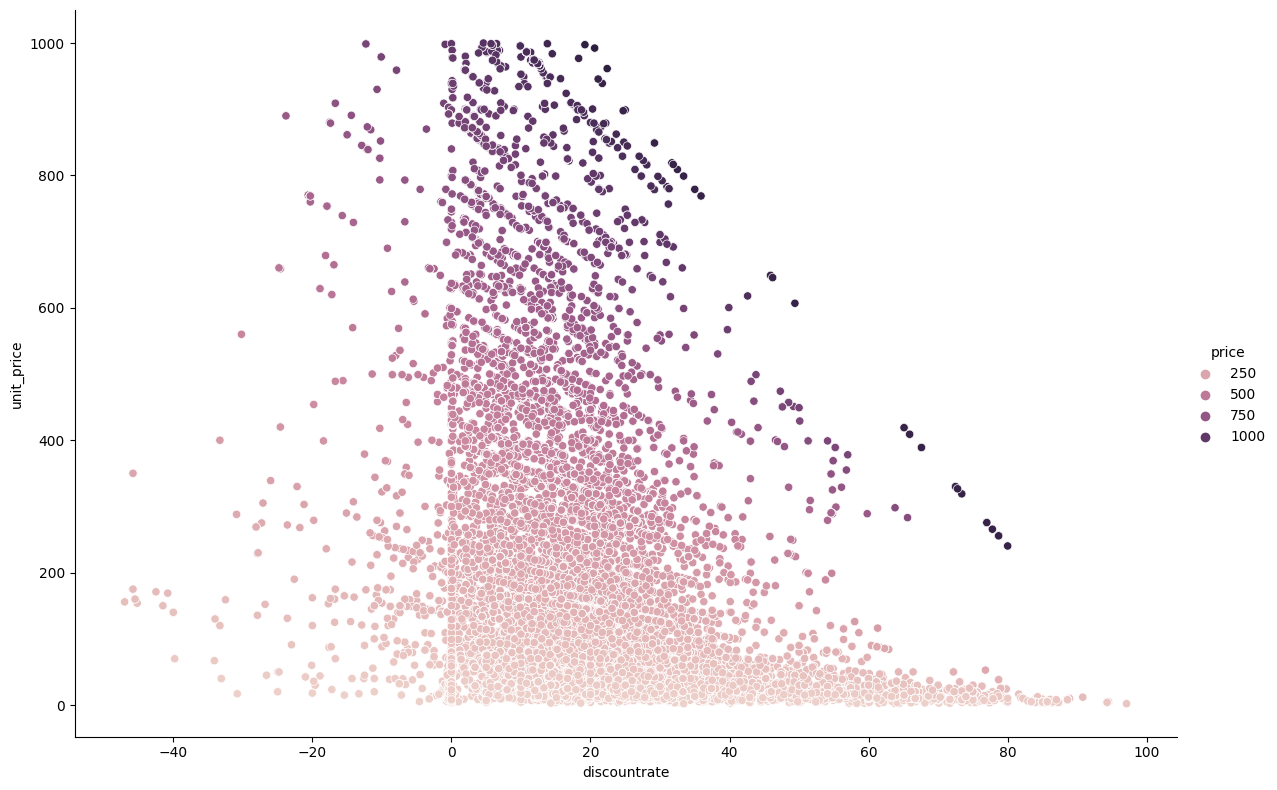

In [ ]:
sns.relplot(data=orders_products_try_harde_limit,
            x="discountrate",
            y="unit_price",
            hue="price",height=8, aspect=1.5
            );

In [ ]:
sns.relplot(data=orders_products_try_harde_limit,
            x="discountrate",
            y="revenue",
            hue="price",height=8, aspect=1.5
            );

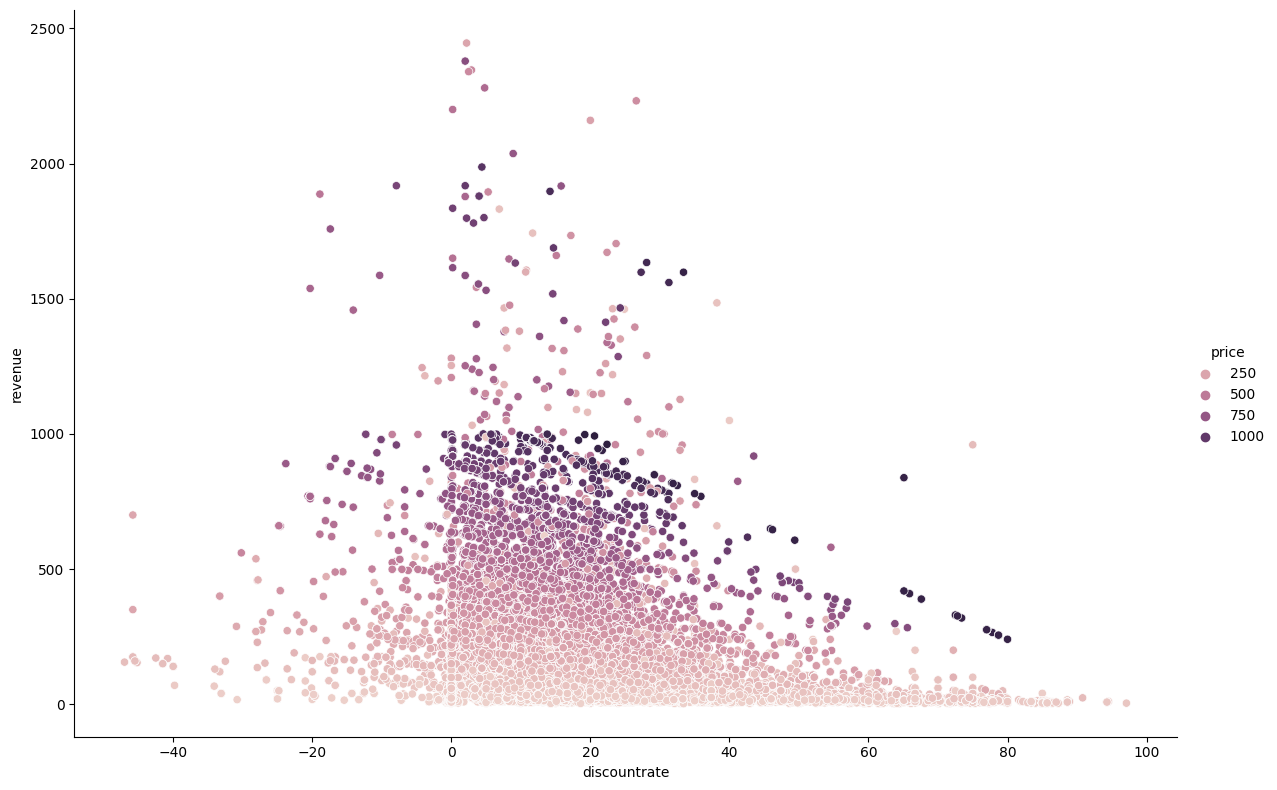

In [ ]:
sns.relplot(data=orders_products_try_harde_limit,
            x="discountrate",
            y="revenue",
            hue="price",height=8, aspect=1.5
            );

In [ ]:
orders_products.groupby("discountrate")["revenue"].mean().reset_index()

,discountrate,revenue
0,-212.3,24.95
1,-81.3,135.99
2,-61.3,170.99
3,-58.3,189.99
4,-54.7,163.99
...,...,...
914,88.9,9.99
915,90.8,23.68
916,94.3,7.98
917,94.5,9.98


In [ ]:
orders_products.groupby("type")["revenue"].sum().nlargest(10).reset_index()

,type,revenue
0,11935397,738576.55
1,1296,656947.12
2,12175397,460434.85
3,12215397,451277.53
4,1364,387748.96
5,12655397,385262.34
6,51601716,310634.64
7,11905404,284288.31
8,5384,257855.65
9,1405,248143.27


In [ ]:
special_orders_products = orders_products_try_harde_limit.loc[orders_products_try_harde_limit["type"].isin(["11935397","1296","12175397","12215397","1364","12655397","51601716","11905404","5384","1405"])]

In [ ]:
orders_most_sold = orders_products.groupby("type")["revenue"].sum().nlargest(10).reset_index()

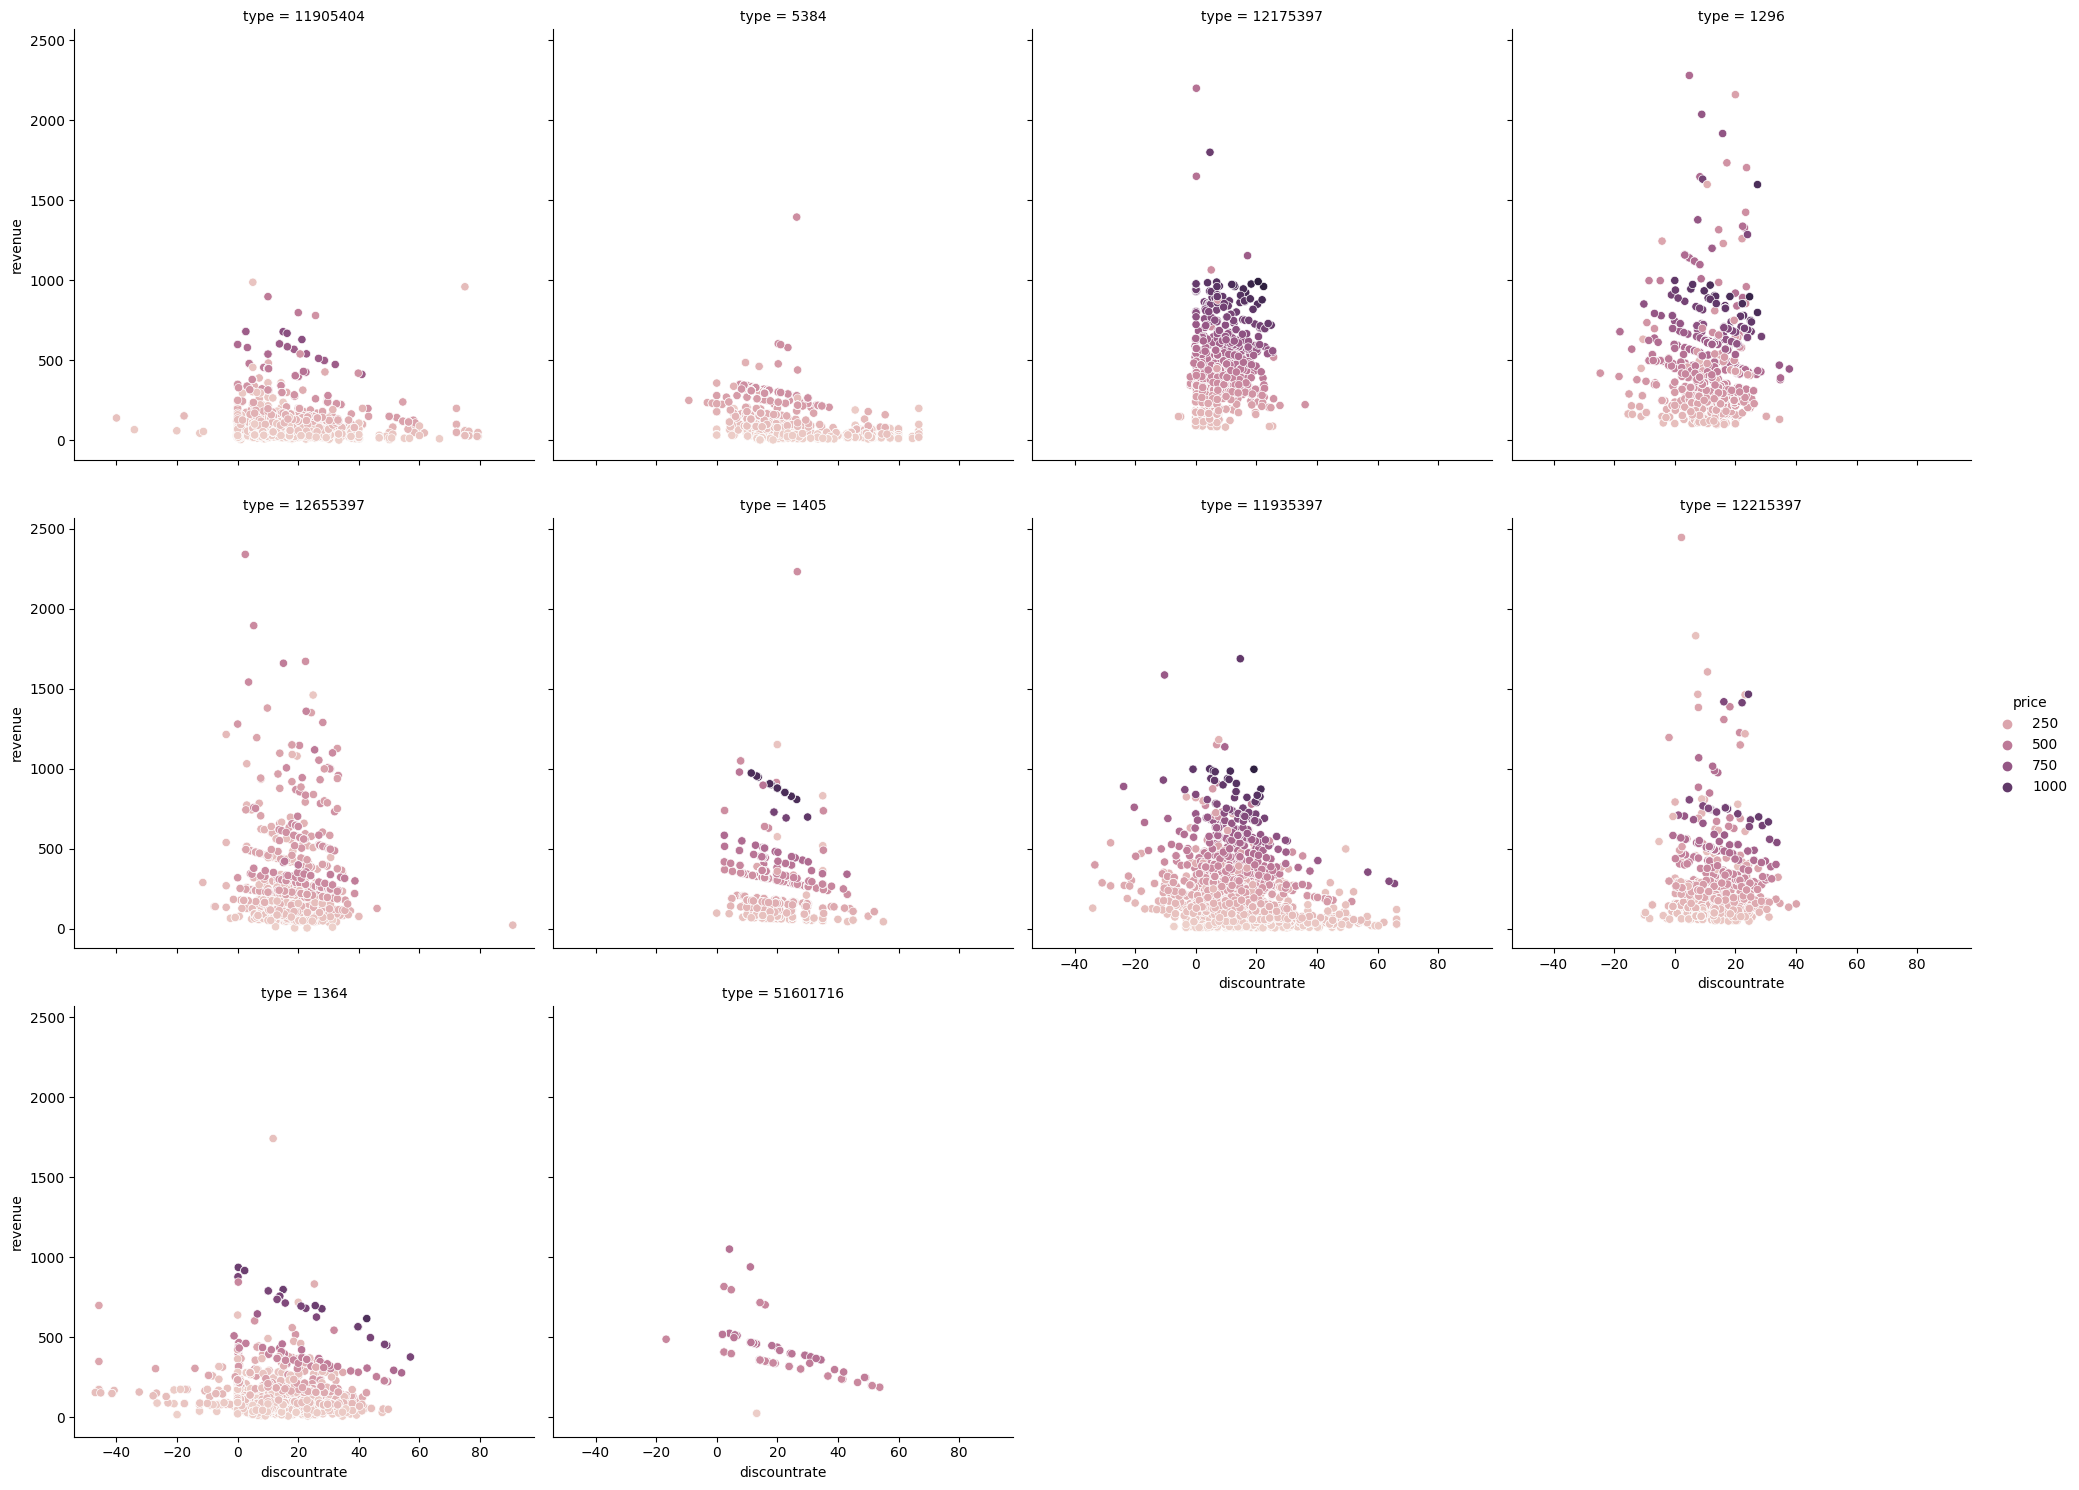

In [ ]:
sns.relplot(data=special_orders_products,
            x="discountrate",
            y="revenue",
            hue="price",
            col="type",
            col_wrap=4,
            aspect=1
            );

In [ ]:
#special_orders_products.info()
#0 11935397
#1	1296
#2	12175397
##3	12215397
#4	1364
#5	12655397
#6	51601716
#7	11905404
#8	5384
#9	1405

In [ ]:
# porbbably wrong special_orders_products["kind_of_product"] = special_orders_products.loc[special_orders_products"sku"=="11905404"=["kind_of_product" =["smart_watch"]]]

In [ ]:
special_orders_products.loc[special_orders_products["type"] == "11905404", "kind_of_product"] = "electronic_gadgets"
special_orders_products.loc[special_orders_products["type"] == "11935397", "kind_of_product"] = "portable_harddrive"
special_orders_products.loc[special_orders_products["type"] == "12175397", "kind_of_product"] = "nas_server"
special_orders_products.loc[special_orders_products["type"] == "12215397", "kind_of_product"] = "ssd_disk"
special_orders_products.loc[special_orders_products["type"] == "12655397", "kind_of_product"] = "sata_harddrive"
special_orders_products.loc[special_orders_products["type"] == "1296", "kind_of_product"] = "monitor"
special_orders_products.loc[special_orders_products["type"] == "1364", "kind_of_product"] = "ram_for_mac"
special_orders_products.loc[special_orders_products["type"] == "1405", "kind_of_product"] = "drawing_table"
special_orders_products.loc[special_orders_products["type"] == "51601716", "kind_of_product"] = "mac_spare_parts"
special_orders_products.loc[special_orders_products["type"] == "5384", "kind_of_product"] = "headphones"

In [ ]:
special_orders_products.loc[special_orders_products["type"] == "5384"].head(50)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discountrate,revenue,kind_of_product
200,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,14.5,256.49,headphones
201,1135870,305187,0,1,BEA0065,269.99,2017-01-08 23:09:30,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,10.0,269.99,headphones
202,1263058,363086,0,1,BEA0065,269.99,2017-06-07 11:07:09,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,10.0,269.99,headphones
203,1428506,434945,0,1,BEA0065,216.19,2017-11-23 15:44:58,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,27.9,216.19,headphones
204,1451013,445129,0,1,BEA0065,216.19,2017-11-26 12:53:33,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,27.9,216.19,headphones
205,1457180,447912,0,1,BEA0065,216.19,2017-11-27 12:32:44,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,27.9,216.19,headphones
3554,1120002,299984,0,1,APP0927,19.99,2017-01-01 21:10:46,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,42.9,19.99,headphones
3555,1120584,300268,0,1,APP0927,19.99,2017-01-02 08:40:39,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,42.9,19.99,headphones
3556,1120618,300281,0,1,APP0927,19.99,2017-01-02 09:08:57,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,42.9,19.99,headphones
3557,1120688,300315,0,2,APP0927,19.99,2017-01-02 10:02:46,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,42.9,39.98,headphones


In [ ]:
sns.relplot(data=special_orders_products,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=4,
            aspect=1
            );

In [ ]:
special_orders_products2 = special_orders_products

In [ ]:
sns.relplot(data=special_orders_products2,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
special_orders_products2.loc[special_orders_products["type"] == "12175397", "kind_of_product"] = "nas_server"


In [ ]:
electronic_gadgets = special_orders_products2.loc[special_orders_products2["kind_of_product"] == "electronic_gadgets"]

In [ ]:
nas_server = special_orders_products2.loc[special_orders_products2["kind_of_product"] == "nas_server"]

In [ ]:
headphones = special_orders_products2.loc[special_orders_products2["kind_of_product"] == "headphones"]

In [ ]:
sns.relplot(data=headphones,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            aspect=1
            );

In [ ]:
sns.relplot(data=electronic_gadgets,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            aspect=1
            );

In [ ]:
sns.relplot(data=nas_server,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            aspect=1
            );

In [ ]:
three_products = special_orders_products2.loc[special_orders_products2["kind_of_product"].isin(["electronic_gadgets", "headphones", "nas_server"])]


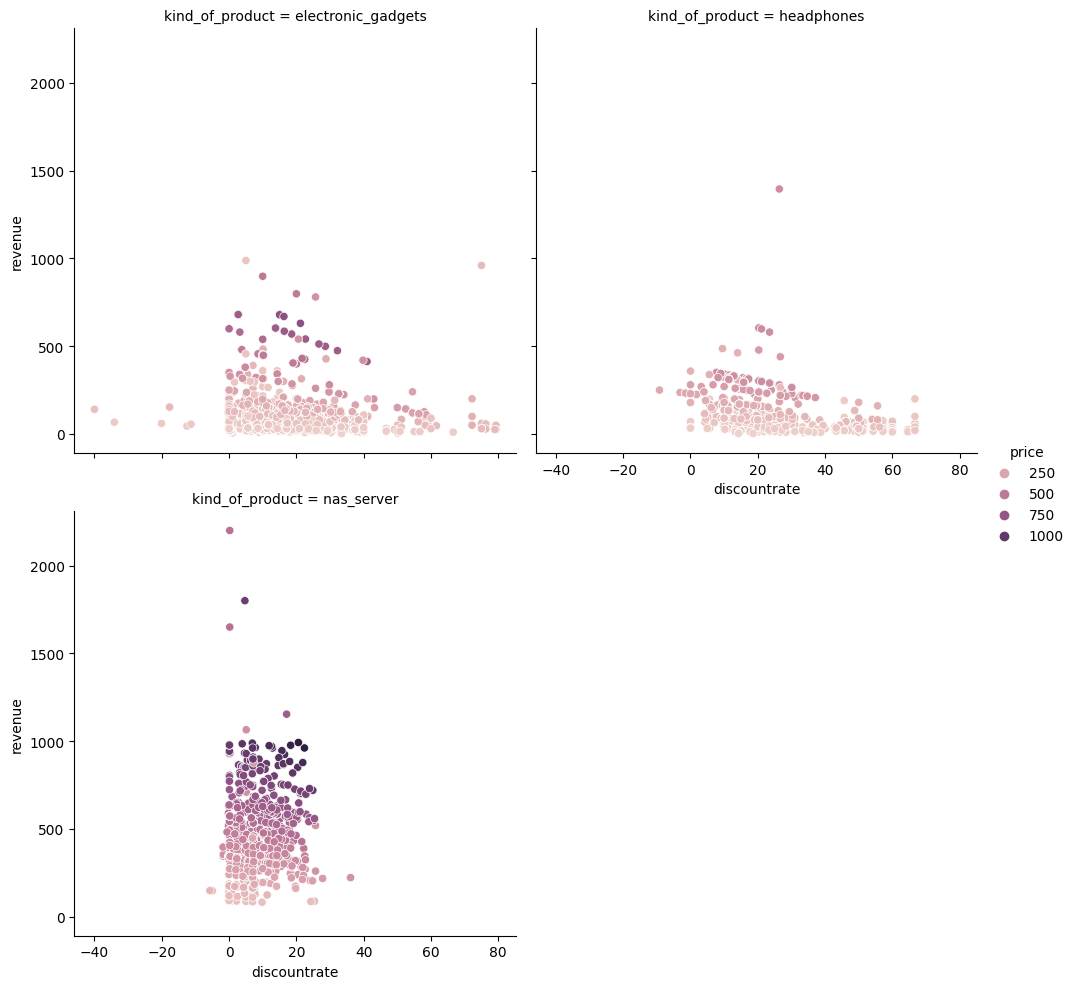

In [ ]:
sns.relplot(data=three_products,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

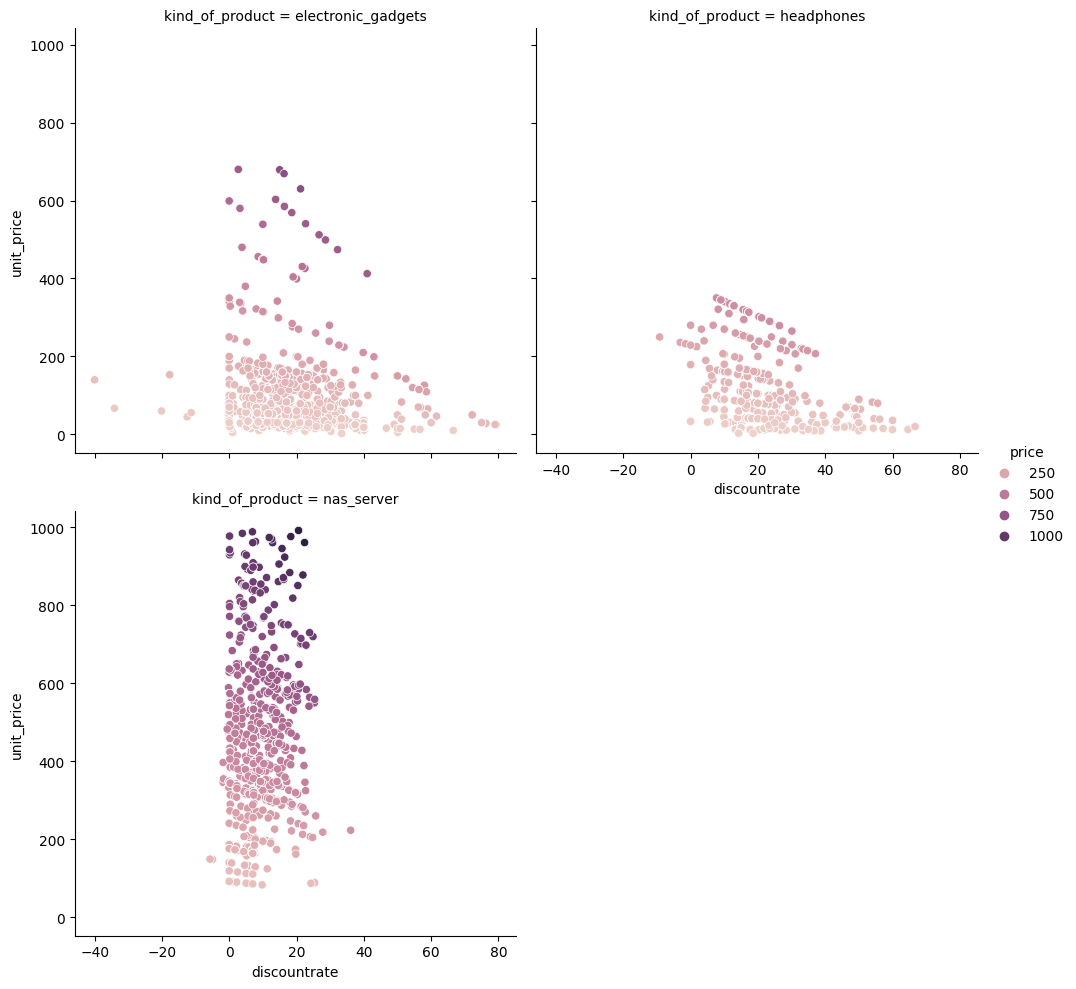

In [ ]:
sns.relplot(data=three_products,
            x="discountrate",
            y="unit_price",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
nea = special_orders_products.loc[special_orders_products["sku"] == "NEA0009"]
nea

In [ ]:
pebble = special_orders_products.loc[special_orders_products["sku"] == "PEB0015"]
pebble

In [ ]:
crucial_mx300 = special_orders_products.loc[special_orders_products["sku"] == "CRU0051"]
crucial_mx300

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discountrate,revenue,kind_of_product
9978,1121762,300746,0,1,CRU0051,144.99,2017-01-02 17:05:34,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk
9979,1122777,301214,0,1,CRU0051,144.99,2017-01-03 00:24:01,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk
9980,1131745,303364,0,1,CRU0051,144.99,2017-01-05 20:38:15,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk
9981,1135772,305126,0,1,CRU0051,144.99,2017-01-08 22:46:21,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk
9982,1140732,307157,0,1,CRU0051,144.99,2017-01-11 11:21:47,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10242,1537347,481974,0,1,CRU0051,121.90,2018-01-04 15:19:46,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk
10243,1540051,482443,0,1,CRU0051,121.90,2018-01-05 15:41:37,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk
10244,1542739,483948,0,1,CRU0051,121.90,2018-01-06 21:04:25,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk
10245,1543931,484403,0,1,CRU0051,121.90,2018-01-07 17:46:35,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk


In [ ]:
lge = special_orders_products.loc[special_orders_products["sku"] == "LGE0044"]
lge

In [ ]:
sns.relplot(data=nea,
            x="discountrate",
            y="unit_price",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
sns.relplot(data=nea,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
sns.relplot(data=pebble,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
sns.relplot(data=pebble,
            x="discountrate",
            y="unit_price",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
sns.relplot(data=lge,
            x="discountrate",
            y="unit_price",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

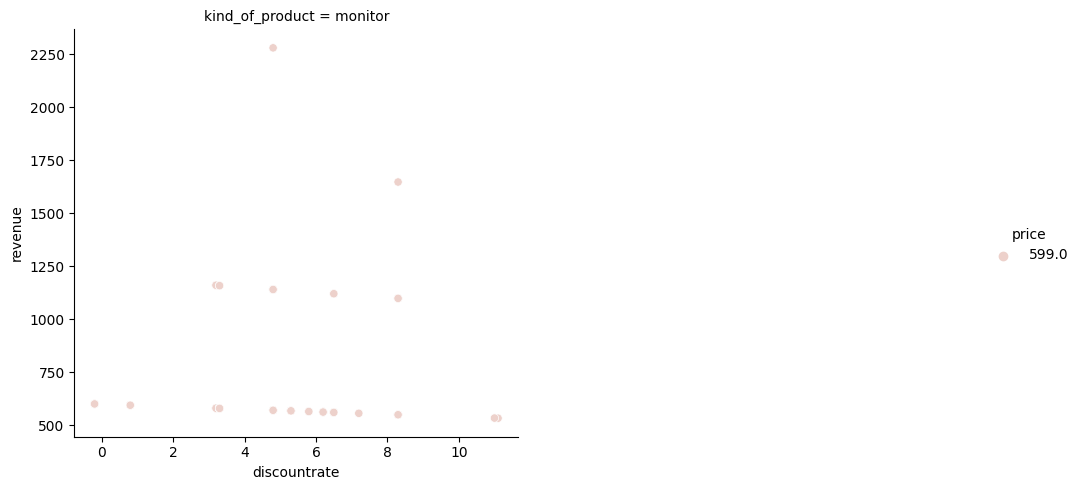

In [ ]:
sns.relplot(data=lge,
            x="discountrate",
            y="revenue",
            hue="price",
            col="kind_of_product",
            col_wrap=2,
            aspect=1
            );

In [ ]:
lge["count_sold_for_this_price"] = lge.groupby("unit_price")["unit_price"].transform("count")
lge

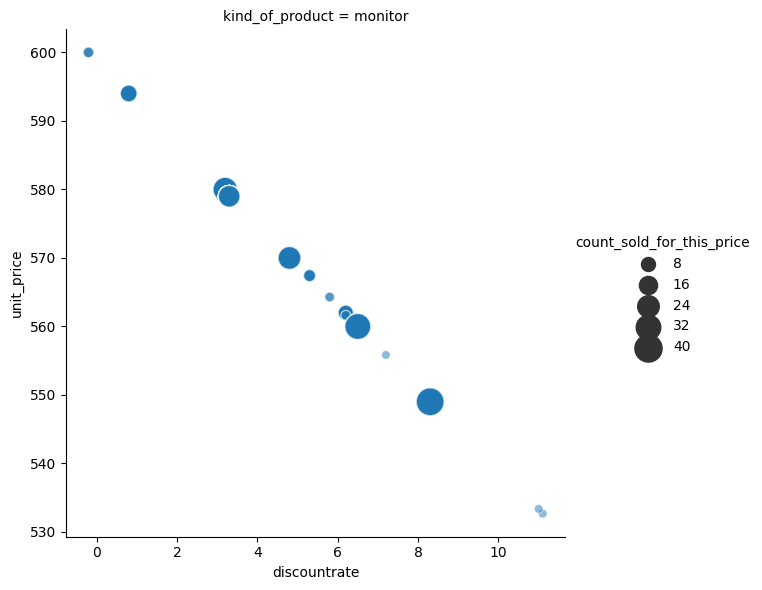

In [ ]:
sns.relplot(data=lge,
            x="discountrate",
            y="unit_price",
            col="kind_of_product",
            size="count_sold_for_this_price",
            sizes=(40, 400),
            alpha=.5, palette="muted",
            height=6,
            aspect=1,

            );

In [ ]:
crucial_mx300["count_sold_for_this_price"] = crucial_mx300.groupby("unit_price")["unit_price"].transform("count")
crucial_mx300

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discountrate,revenue,kind_of_product,sold_for_price,_count_sold_for_this_price,count_sold_for_this_price
9978,1121762,300746,0,1,CRU0051,144.99,2017-01-02 17:05:34,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk,27,27,27
9979,1122777,301214,0,1,CRU0051,144.99,2017-01-03 00:24:01,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk,27,27,27
9980,1131745,303364,0,1,CRU0051,144.99,2017-01-05 20:38:15,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk,27,27,27
9981,1135772,305126,0,1,CRU0051,144.99,2017-01-08 22:46:21,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk,27,27,27
9982,1140732,307157,0,1,CRU0051,144.99,2017-01-11 11:21:47,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,8.6,144.99,ssd_disk,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10242,1537347,481974,0,1,CRU0051,121.90,2018-01-04 15:19:46,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk,47,47,47
10243,1540051,482443,0,1,CRU0051,121.90,2018-01-05 15:41:37,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk,47,47,47
10244,1542739,483948,0,1,CRU0051,121.90,2018-01-06 21:04:25,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk,47,47,47
10245,1543931,484403,0,1,CRU0051,121.90,2018-01-07 17:46:35,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,23.2,121.90,ssd_disk,47,47,47


In [ ]:
grouped_sku = special_orders_products.groupby("sku")["desc"].count().reset_index().sort_values(by="desc", ascending = False)
grouped_sku


,sku,desc
35,APP1922,511
31,APP0927,378
1133,SAM0074,298
1398,WDT0183,289
148,CRU0051,269
...,...,...
1222,SEA0124,1
1221,SEA0121,1
919,PAC1472,1
1218,SEA0114,1


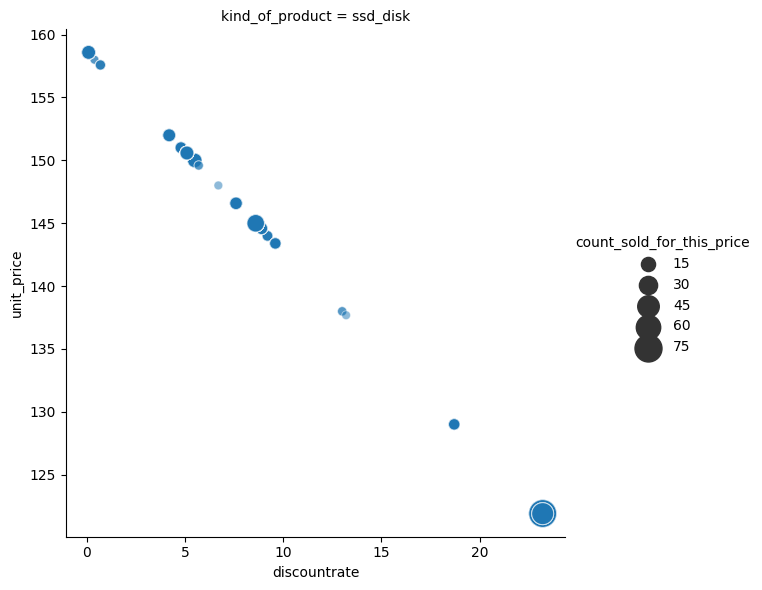

In [ ]:
sns.relplot(data=crucial_mx300,
            x="discountrate",
            y="unit_price",
            col="kind_of_product",
            size="count_sold_for_this_price",
            sizes=(40, 400),
            alpha=.5, palette="muted",
            height=6,
            aspect=1,

            );